# Analysis of Grating
Experimentation code
* Imports image
* Takes 2D FFT
* Analyses the frequency component



In [82]:
import skimage
from skimage import io
import matplotlib.pyplot as plt

from scipy.fft import fft, fft2,fftshift, fftfreq
import numpy as np
import scipy as sp

In [173]:
PATH_TO_IMAGE =  '../OPT Shared files/2022-10-31 dof contd/aperture/2022-10-31-f6 depth sweep wide range stack/MMStack_Pos0.ome.tif'

Loads image of Ronchi grating in.

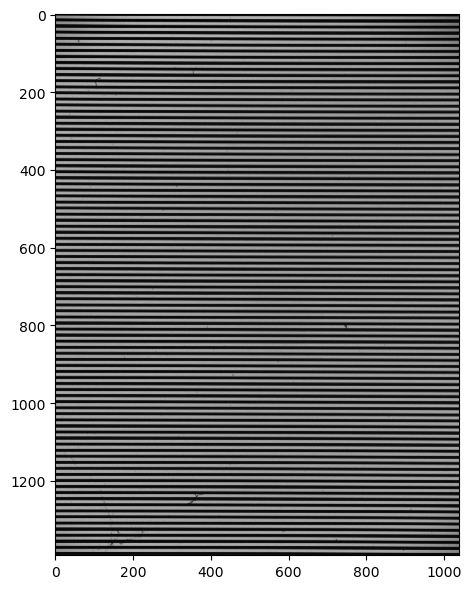

In [54]:
im_stack = io.imread(PATH_TO_IMAGE)
im = im_stack[15]
plt.figure(figsize=(6,6))
io.imshow(im)

An example line profile, no cropping used.

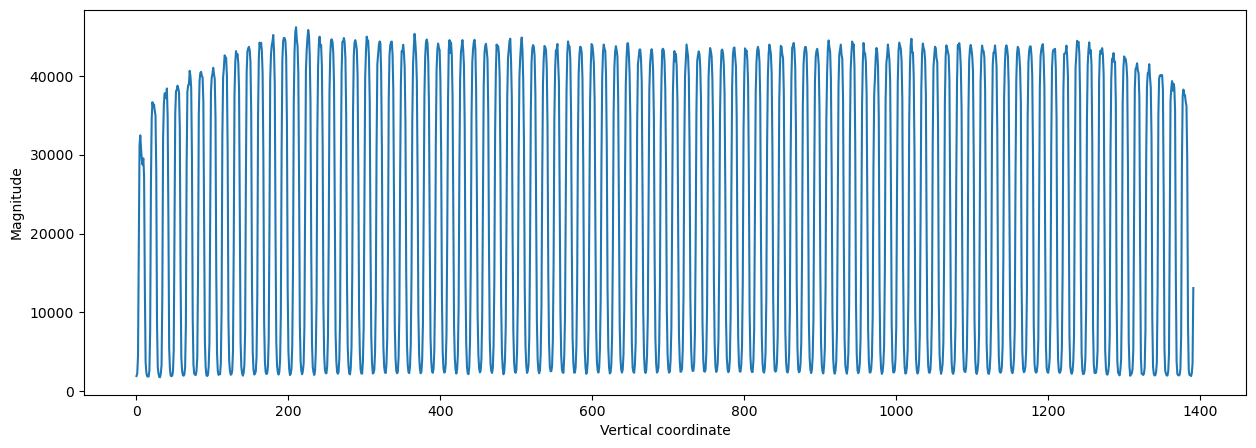

In [55]:
plt.figure(figsize=(15,5))
plt.ylabel('Magnitude')
plt.xlabel('Vertical coordinate')
plt.plot(im[:,0])

**Unit conversions**

Line pair / mm refers to a frequency unit, which is equivalent to cycles per mm.

We know that 1 pixel has size $e = 6.45 \ \mu m$. Thus 1 pixel represents $l = e/m$ in object space where $m$ is the lens magnification.

The highest frequency that can be sampled is $k = \frac{1}{2l} = \frac{m}{2e}$.

In [76]:
e = 6.45/ 1000 # pixel size (mm)
m = 0.5
length_per_pixel = e/m

Text(0.5, 0, 'Horizontal spatial frequency (lp mm$^{-1}$)')

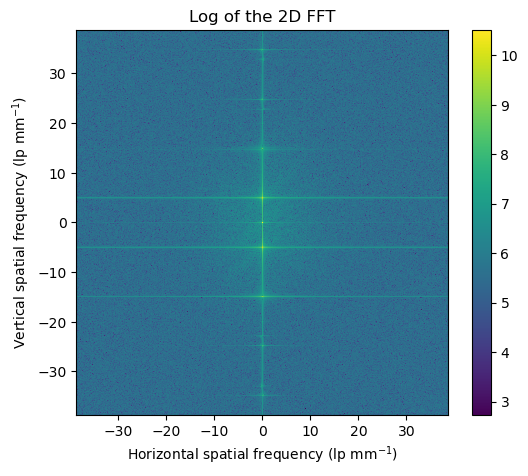

In [75]:
# Take FFT
ft = fftshift(fft2(im))

x_size = ft.shape[0]
y_size = ft.shape[1]

# multiply by 2 to get units in line pairs per mm
x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )


ft_log = np.log10(np.abs(ft))
X,Y = np.meshgrid(x_freqs, y_freqs)
plt.figure(figsize=(6,5))
plt.title('Log of the 2D FFT')
plt.pcolormesh(Y, X, ft_log.T, shading='auto')
plt.colorbar()
plt.ylabel('Vertical spatial frequency (lp mm$^{-1}$)')
plt.xlabel('Horizontal spatial frequency (lp mm$^{-1}$)')

Text(0.5, 0, 'Frequencies (cycle per pixel)')

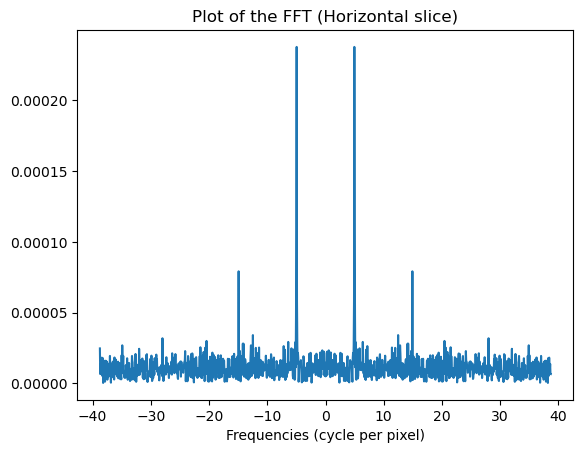

In [80]:
plt.title('Plot of the FFT (Horizontal slice)')
plt.plot(x_freqs, (np.abs(ft)[:,0])/np.max(np.abs(ft)), ls='-')
plt.xlabel('Frequencies (cycle per pixel)')

Extract peaks from the Fourier Transform

In [150]:
ft_slice = (np.abs(ft)[:,y_size//2])/np.max(np.abs(ft))
peaks, _ = sp.signal.find_peaks(ft_slice, height=0.001)

base_frequency = 4.956339659627551
selected_freqs = x_freqs[peaks]/base_frequency

# Filter out unwanted frequencies
mask = np.logical_or((np.abs(selected_freqs) > 1) & (np.abs(selected_freqs) < 3 ), (np.abs(selected_freqs) > 0) & (np.abs(selected_freqs) < 1 ))

peaks = peaks[np.logical_not(mask)]
print(selected_freqs[np.logical_not(mask)])

[-7.02247191 -5.02247191 -3.01123596 -1.          0.          1.
  3.01123596  5.02247191  7.02247191]


Text(0.5, 0, 'Frequencies (line pairs per mm)')

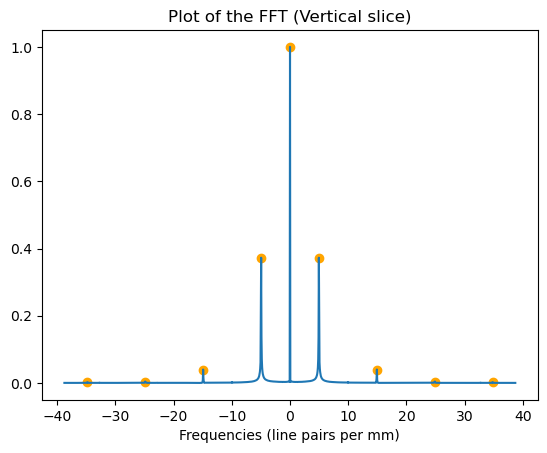

In [176]:
plt.plot(x_freqs, ft_slice, ls='-')
plt.scatter(x_freqs[peaks], ft_slice[peaks], c='orange')
plt.title('Plot of the FFT (Vertical slice)')
plt.xlabel('Frequencies (line pairs per mm)')

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_2095/1830636152.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(harmonics, halved_ft_slice[1]/harmonics, label='Ideal Spectrum')


Text(0.5, 0, 'Harmonic of fundamental frequency')

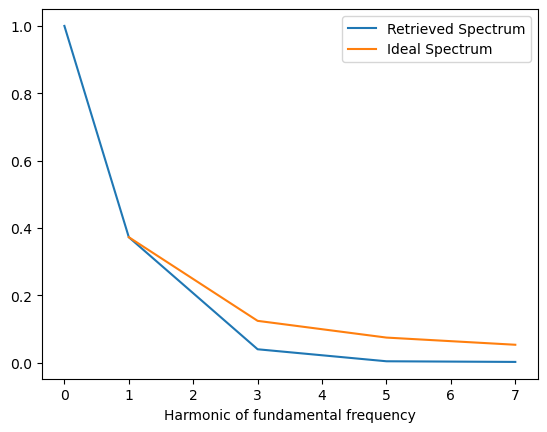

In [171]:
halved_ft_slice = ft_slice[peaks][len(ft_slice[peaks])//2:]
harmonics = np.array([0, 1, 3, 5, 7])
plt.plot(harmonics, halved_ft_slice, label='Retrieved Spectrum')
plt.plot(harmonics, halved_ft_slice[1]/harmonics, label='Ideal Spectrum')
plt.legend()
plt.xlabel('Harmonic of fundamental frequency')

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_2095/779380746.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(harmonics, halved_ft_slice/(halved_ft_slice[1]/harmonics), label='Retrieved Spectrum')


Text(0.5, 0, 'Harmonic of fundamental frequency')

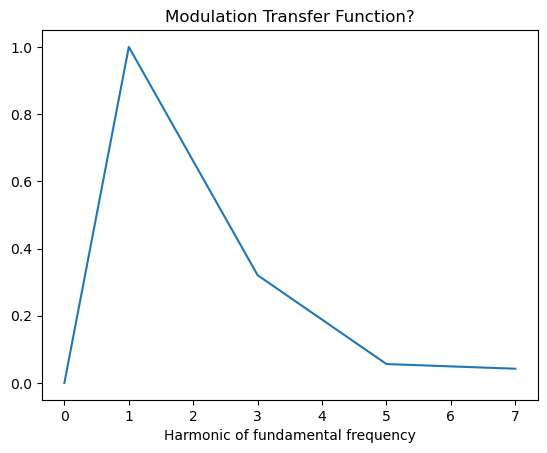

In [175]:
plt.title('Modulation Transfer Function?')
plt.plot(harmonics, halved_ft_slice/(halved_ft_slice[1]/harmonics), label='Retrieved Spectrum')
plt.xlabel('Harmonic of fundamental frequency')

This is the maximum harmonic the system (grating and optics) can capture.

In [126]:
x_freqs[-1]/base_frequency

7.808988764044943

# Analysis
* Applied to a stack of images

(17, 500, 300)


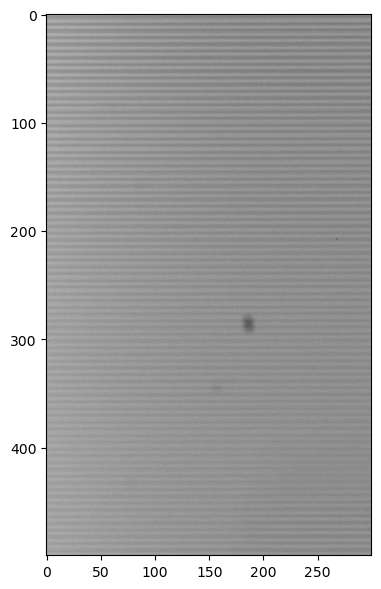

In [8]:
AIR_IMAGE_PATH =  '../data_store/20221023/f6_stack_air.tif'
im = io.imread(AIR_IMAGE_PATH)[:, 300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im[11])
print(im.shape)

In [9]:
x_size = im.shape[2]
y_size = im.shape[1]

In [10]:
ft_stack = fftshift(fft2(im), axes=[-1,-2])
ft_abs = np.abs(ft_stack)
ft_log = np.log10(ft_abs)

An example of the 2D FFT

Text(0.5, 0, 'x Frequency (cycle per pixel)')

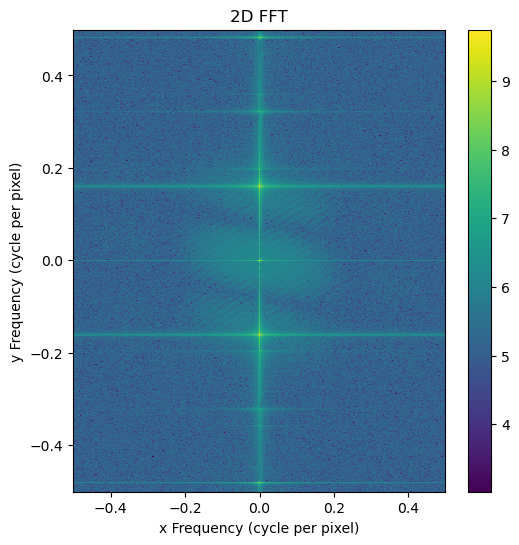

In [11]:
plt.figure(figsize=(6,6))
plt.title('2D FFT')

x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )
X,Y = np.meshgrid(x_freqs, y_freqs)

plt.pcolormesh(X,Y,ft_log[7], shading='auto')
plt.colorbar()
plt.ylabel('y Frequency (cycle per pixel)')
plt.xlabel('x Frequency (cycle per pixel)')


Plot out several frequencies for inspection

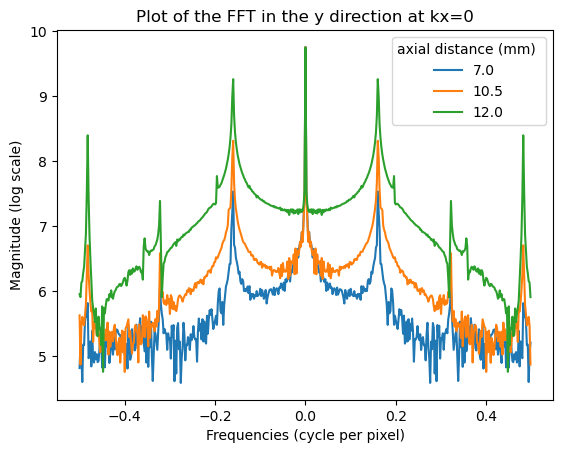

In [12]:
plt.title('Plot of the FFT in the y direction at kx=0')
air_range = np.array([7, 8, 9, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 17])

def plot_line(idx):
    data = ft_log[idx,:, x_size//2]
    plt.plot(y_freqs, data, label=air_range[idx])

plot_line(0)
plot_line(4)
plot_line(7)

plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude (log scale)')
plt.legend(title='axial distance (mm) ')

Plot all the frequencies

Text(0, 0.5, 'Magnitude')

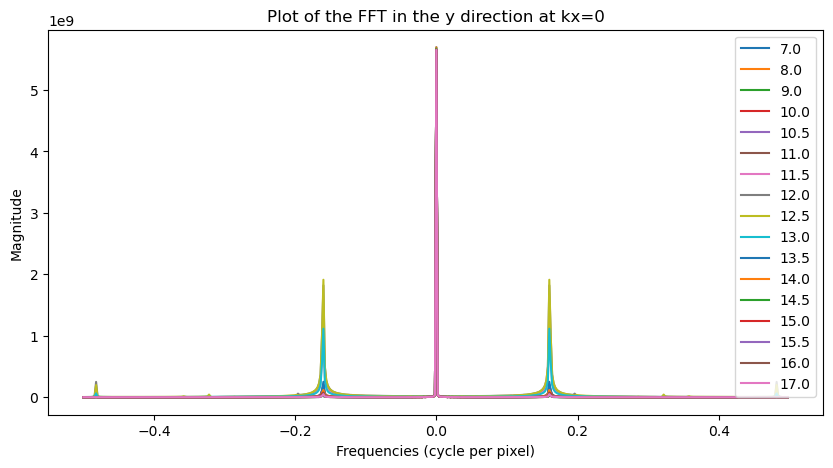

In [13]:
plt.figure(figsize=(10,5))
plt.title('Plot of the FFT in the y direction at kx=0')

plt.plot( y_freqs, (np.moveaxis(np.abs(ft_stack[:,:, x_size//2]), 0, -1)), label=air_range)
plt.legend()
plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude')

## Modelling

* Eyeball grating function
* Scaled everything to the correct range

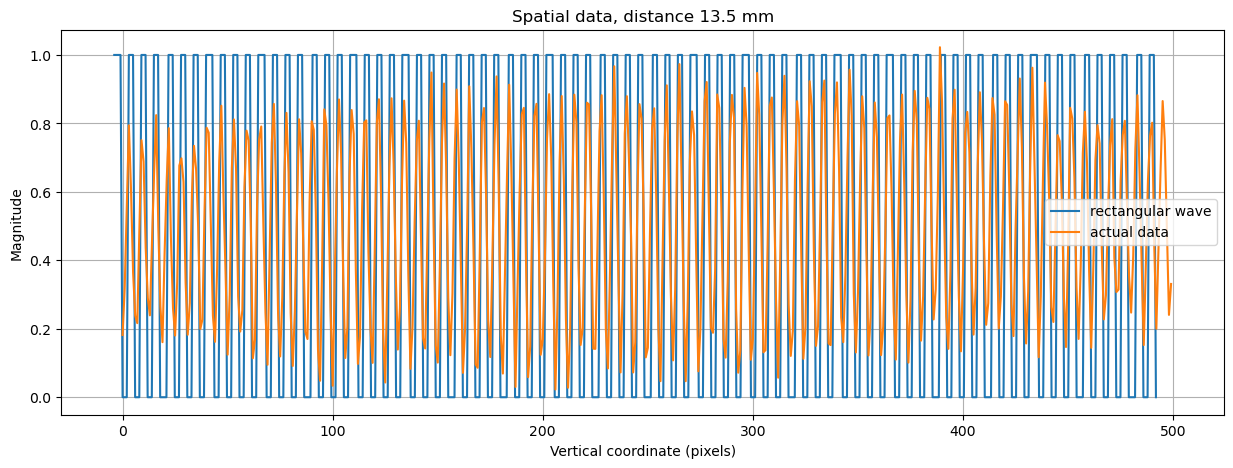

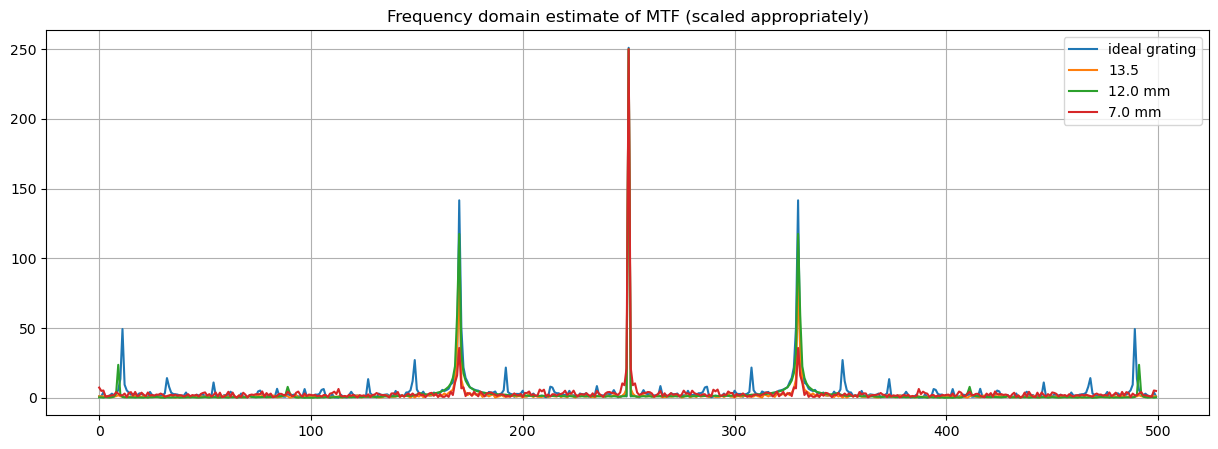

In [14]:
import scipy as sp

plt.figure(figsize=(15,5))

t = np.linspace(0, y_size, y_size)


period = 6.23 # in pixels
shift = 4 # pixels

wave = 0.5*sp.signal.square(t) + 0.5
slice = 10

# Scaling the data
def scale_data(data):
    data_mid = (np.max(data) + np.min(data))/2
    data_mid = np.average(data)
    data_range = (np.max(data) - np.min(data))
    data = (data-data_mid)/data_range + 0.5
    return data

data = scale_data(im[slice,:, 0].astype('float64'))
plt.plot(period* (t-shift) / (2*np.pi), wave, label='rectangular wave' )
plt.plot(data, label='actual data')

# plt.xlim(300,400)

plt.title(f'Spatial data, distance {air_range[slice]} mm')
plt.ylabel('Magnitude')
plt.xlabel('Vertical coordinate (pixels)')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.title(f'Frequency domain estimate of MTF (scaled appropriately)')
plt.plot(np.abs(fftshift(fft(wave))), label='ideal grating')
plt.plot(np.abs(fftshift(fft(data))), label=f'{air_range[slice]}')
plt.plot(np.abs(fftshift(fft(scale_data(im[7,:, 0].astype('float64'))))), label=f'{air_range[7]} mm')
plt.plot(np.abs(fftshift(fft(scale_data(im[0,:, 0].astype('float64'))))), label=f'{air_range[0]} mm')
plt.grid()
plt.legend()
plt.show()

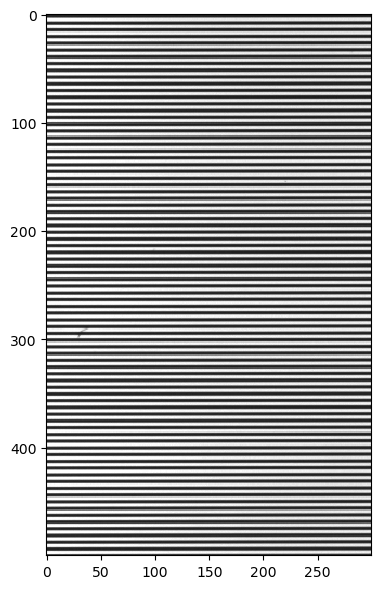

In [15]:
WATER_IMAGE_PATH =  '../data_store/20221023/f6_stack_water.tif'
im_water = io.imread(WATER_IMAGE_PATH)[:, 300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im_water[11])
water_range = np.array([9, 10, 11, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18, 18.5, 19, 20, 21])

## DOF by contrast

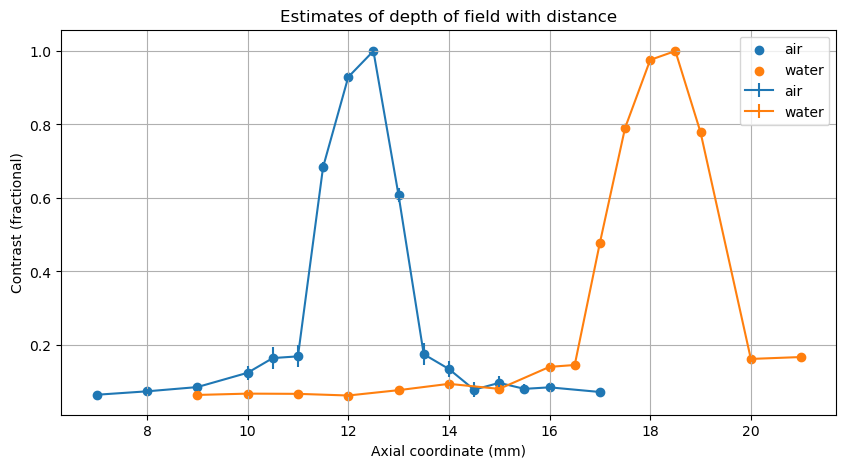

In [16]:
def get_contrast(image_stack):
    """Obtains an estimate of the Michelson contrast

    Args:
        image_stack (np.array): focal scanning stack of 2D images, assuming to be the grating

    Returns:
        contrast_avg, contrast_std: mean and std deviation of contrast estimates
    """
    N_images = len(image_stack)
    N_sections = 20
    N_lines = 30

    results = np.zeros((N_images, N_lines, N_sections))
    maxes = np.zeros((N_images, N_lines))

    image_stack = image_stack.astype('float64')
    maxes = np.max(image_stack[:,:,0::5], axis=1)
    mins = np.min(image_stack[:,:,0::5], axis=1)

    # Michelson contrast
    contrast = (maxes - mins)/ (maxes + mins)
    contrast_avg = np.average(contrast, axis=1)
    contrast_std = np.std(contrast, axis=1)

    return contrast_avg, contrast_std

# Calculates the contrast of a stack of images of a grating in air and in water
air_contrast, air_contrast_std = get_contrast(im)
water_contrast, water_contrast_std = get_contrast(im_water)

# Plots the curve
plt.figure(figsize=(10,5))
plt.scatter(air_range, air_contrast/np.max(air_contrast), label='air')
plt.errorbar(air_range, air_contrast/np.max(air_contrast), yerr=air_contrast_std, label='air')
plt.scatter(water_range, water_contrast/np.max(water_contrast), label='water')
plt.errorbar(water_range, water_contrast/np.max(water_contrast), yerr=water_contrast_std, label='water')

plt.title('Estimates of depth of field with distance')
plt.xlabel('Axial coordinate (mm)')
plt.ylabel('Contrast (fractional)')
plt.grid(which='both')

plt.legend()


In [17]:
air_contrast_std

array([0.00611823, 0.00686778, 0.01194487, 0.01948975, 0.02992609,
       0.0298086 , 0.01395772, 0.00906655, 0.01033586, 0.01881947,
       0.03014022, 0.02150894, 0.01998312, 0.01735562, 0.01216348,
       0.00812938, 0.00666477])

In [18]:
im_water.shape

(16, 500, 300)

Quick analysis script

In [19]:
PATH =  '../OPT Shared files/2022-10-31/2022-10-31-f6 depth sweep wide range stack/MMStack_Pos0.ome.tif'

im = io.imread(PATH)[:, 300:800, 300:600]
# plt.figure(figsize=(6,6))
# io.imshow(im_water[11])
dist_range = np.arange(25, 2, -1)

# Calculates the contrast of a stack of images of a grating in air and in water
air_contrast, air_contrast_std = get_contrast(im)

PATH =  '../OPT Shared files/2022-10-31/2022-10-31-f22 depth sweep wide range stack/MMStack_Pos0.ome.tif'
im = io.imread(PATH)[:, 300:800, 300:600]
dist_range_2 = np.arange(25, -1, -1)

# Calculates the contrast of a stack of images of a grating in air and in water
f22_contrast, f22_contrast_std = get_contrast(im)

# Plots the curve
plt.figure(figsize=(10,5))
plt.scatter(dist_range, air_contrast/np.max(air_contrast), label='f6')
plt.errorbar(dist_range, air_contrast/np.max(air_contrast), yerr=air_contrast_std)
plt.scatter(dist_range_2, f22_contrast/np.max(f22_contrast), label='f22')
plt.errorbar(dist_range_2, f22_contrast/np.max(f22_contrast), yerr=f22_contrast_std)

plt.title('Estimates of depth of field with distance')
plt.xlabel('Axial coordinate (mm)')
plt.ylabel('Contrast (fractional)')
plt.grid(which='both')

plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kenton/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/Physics/Year 4/project/OPT Shared files/2022-10-31/2022-10-31-f6 depth sweep wide range stack/MMStack_Pos0.ome.tif'

# DOF Model


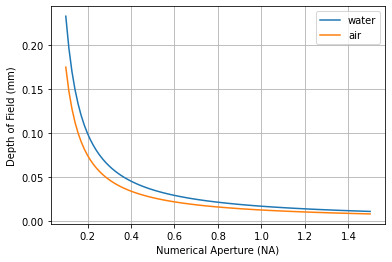

In [ ]:
def dof(NA, lamb, M, n_bath, e):

    return n_bath * (lamb / (NA*NA) + e/ (M*NA))

NA = np.linspace(0.1, 1.5, 100)
plt.plot(NA, dof(NA, 500e-9, 0.5, 1.33,  6.25e-6)*1000, label='water')
plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Expected DOF variation with NA')

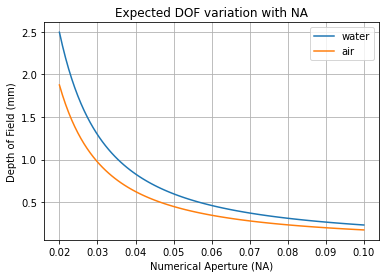

In [ ]:
NA = np.linspace(0.02, 0.1, 100)
plt.plot(NA, dof(NA, 500e-9, 0.5, 1.33,  6.25e-6)*1000, label='water')
plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.grid()
plt.legend()
plt.title('Expected DOF variation with NA')

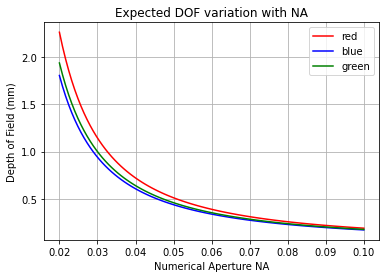

In [ ]:
lambs = np.linspace(300, 800, 100)
plt.plot(NA, dof(NA, 655e-9, 0.5, 1,  6.25e-6)*1000, label='red', c='red')
plt.plot(NA, dof(NA, 472e-9, 0.5, 1,  6.25e-6)*1000, label='blue', c='blue')
plt.plot(NA, dof(NA, 525e-9, 0.5, 1,  6.25e-6)*1000, label='green', c='green')
plt.title('Expected DOF variation with NA')
plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture NA')
plt.grid()
plt.legend()